# Analyzing Life Expectancy and GDP - Data Visualization Project

Economic and social indicators such as life expectancy at birth (LEABY) and gross domestic product (GDP) provide crucial insights into a country's development and overall well-being. While GDP measures a nation's economic performance, life expectancy reflects the health and quality of life of its population. Understanding how these factors evolve over time and how they interact can help us gain a deeper perspective on global progress.

In this project, we will use data visualization and statistical analysis to explore trends in life expectancy and GDP for multiple countries between 2000 and 2015. By analyzing these variables, we aim to uncover patterns and relationships that may highlight the impact of economic growth on public health.

**Key Questions We Aim to Answer:**

- How has life expectancy changed over time for different countries, and what trends can we observe?
- How has GDP evolved over the years in various countries, and what economic patterns emerge?
- How does GDP relate to life expectancy, and what patterns can we observe in different countries?

Through this analysis, we will not only identify general trends and correlations but also examine country-specific variations, providing a more nuanced understanding of global economic and health developments.

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load and Inspect Data

In [2]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Before we begin analyzing life expectancy and GDP trends, we need to clean and prepare the dataset to ensure accurate and efficient analysis. Since we are working with a dataset containing economic and demographic indicators across multiple countries, we define a function that:

- GDP Scaling: Since GDP values are extremely large, we divide them by 1e9 to express them in billions. This makes the values easier to interpret and visualize.
- Column Renaming: The "Life expectancy at birth (years)" column is renamed to "LEABY" to make the dataset more manageable and improve code readability.
- GDP Growth Calculation: We compute the annual GDP growth rate using the percentage change formula, which helps us observe economic fluctuations and long-term trends.

By performing these preprocessing steps, we ensure that our dataset is clean, structured, and ready for in-depth analysis and visualization.

In [3]:
def prepare_data(df):
    df["GDP"] = df["GDP"] / 1e9
    df.rename(columns={'Life expectancy at birth (years)': 'LEABY'}, inplace=True)
    df["GDP Growth"] = df.groupby("Country")["GDP"].pct_change() * 100
    return df

df = prepare_data(df)
df.head()

,Country,Year,LEABY,GDP,GDP Growth
0,Chile,2000,77.3,77.860932,NaN
1,Chile,2001,77.3,70.979924,-8.837562
2,Chile,2002,77.8,69.736811,-1.751358
3,Chile,2003,77.9,75.643460,8.469915
4,Chile,2004,78.0,99.210393,31.155282


In [4]:
df["Country"].unique() # checking how many unique countries are in the dataset

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [5]:
df["Year"].unique() # checking how many unique year are in the dataset

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     96 non-null     object 
 1   Year        96 non-null     int64  
 2   LEABY       96 non-null     float64
 3   GDP         96 non-null     float64
 4   GDP Growth  90 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.9+ KB


Quick summary and initial observations:

- We have data on GDP (Gross Domestic Product) and life expectancy of 6 different countries between 2000 and 2015

- GDP represents the total value of all goods and services produced by a country in a given year. This value is used to measure the economic size of a country.

- GDP Growth shows the annual percentage change in GDP, indicating whether a country's economy is expanding or contracting over time.

### Data Visualizations

#### How has life expectancy changed over time for different countries, and what trends can we observe?

Life expectancy is one of the key indicators of a country's overall health and well-being. Over time, various factors such as healthcare advancements, economic growth, and social policies can influence how long people live. But how have these changes played out across different countries? Have all nations experienced a steady increase, or are there significant differences?

To answer these questions, we will start by looking at the basic statistics of life expectancy to get a general sense of variation between countries. Then, we will examine overall distributions using histograms before diving deeper into country-specific patterns. Finally, we will analyze trends over time with line charts to understand how life expectancy has evolved in each nation.

By following this approach, we aim to uncover important trends and differences that shape life expectancy worldwide.

In [7]:
df.groupby('Country')["LEABY"].agg(["mean", "median", "min", 'max',"std"]).sort_values(by='mean', ascending=False)

,mean,median,min,max,std
Country,,,,,
Germany,79.65625,79.85,78.0,81.0,0.975000
Chile,78.94375,79.00,77.3,80.5,1.058911
United States of America,78.06250,78.15,76.8,79.3,0.832566
Mexico,75.71875,75.65,74.8,76.7,0.620987
China,74.26250,74.45,71.7,76.1,1.318016
Zimbabwe,50.09375,47.40,44.3,60.7,5.940311


When we look at the life expectancy data, we notice significant differences between countries.

- Germany, Chile, and the United States have the highest average life expectancies, all above 78 years, with low standard deviations. This indicates both a high and stable life expectancy over time.
- Mexico and China follow with slightly lower averages, around 74-76 years, but still show relatively stable trends.
- Zimbabwe, however, stands out with a much lower average of 50 years and the highest standard deviation (5.94). This suggests that life expectancy in Zimbabwe has seen significant fluctuations over the years, likely influenced by economic and social challenges.

Now, let’s take a closer look at how life expectancy is distributed across countries with a histogram!

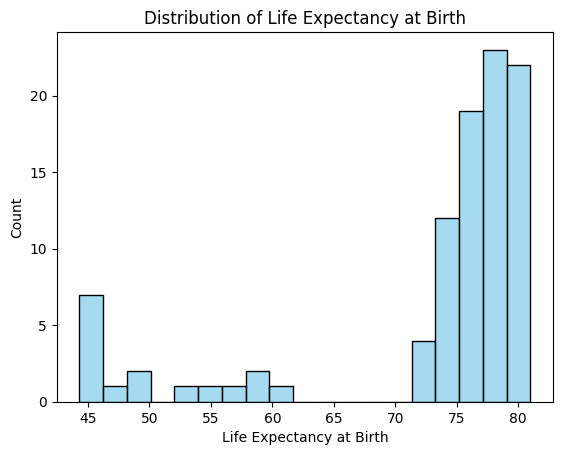

In [8]:
sns.histplot(df["LEABY"],color='skyblue')
plt.xlabel('Life Expectancy at Birth')
plt.title('Distribution of Life Expectancy at Birth')
plt.show()

The histogram clearly shows a bimodal distribution, meaning life expectancy values are grouped into two distinct ranges. Most data points are clustered between 74 and 81 years, while a smaller but noticeable portion falls between 44 and 60 years.

This suggests that while most countries in our dataset have relatively high life expectancy, at least one country (likely Zimbabwe) has significantly lower values. To better understand these differences, let's now examine the life expectancy histograms for each country individually!

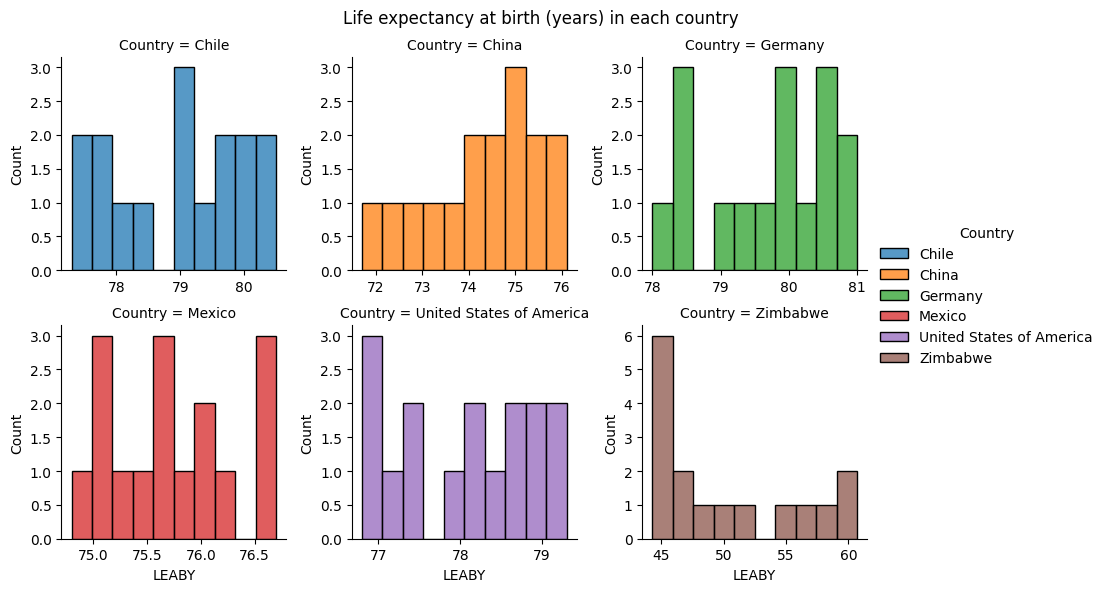

In [9]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3,hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.histplot,"LEABY", bins=10).add_legend())
graph.fig.subplots_adjust(top=0.9)
graph.fig.suptitle('Life expectancy at birth (years) in each country')
plt.show()

These histograms provide a more detailed look at life expectancy distributions within each country:

- Germany, the US, and Chile have stable and high life expectancy, with values concentrated in a narrow range.
- China and Mexico show a slightly wider spread, indicating some variation over time but still within a relatively stable range.
- Zimbabwe, however, stands out with a highly skewed distribution, mostly concentrated at lower values but with a noticeable shift towards higher life expectancy in later years, reflecting periods of improvement.

These distributions help us understand how life expectancy trends differ across countries. Now, let’s explore how life expectancy has changed over time!

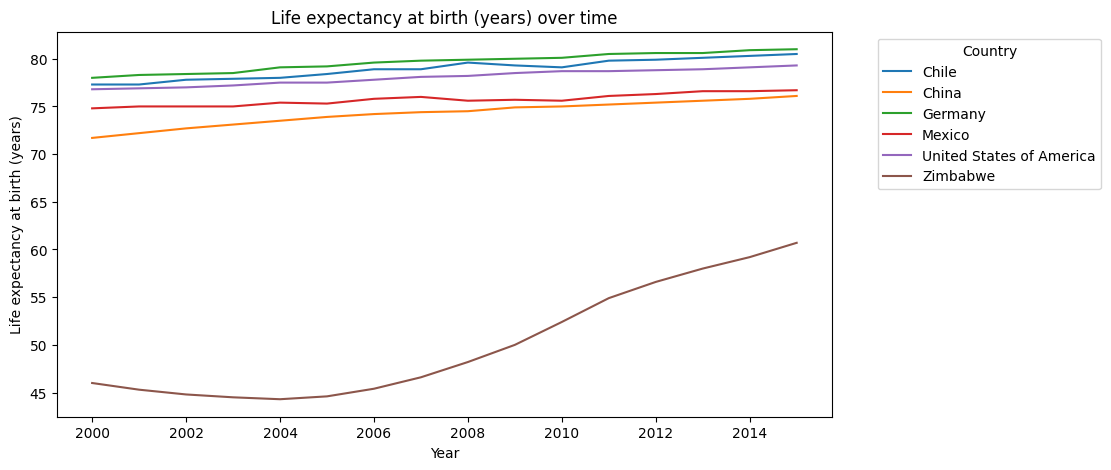

In [10]:
plt.figure(figsize=(10, 5))
ax=sns.lineplot(data=df, x="Year", y="LEABY", hue="Country")
ax.set(title="Life expectancy at birth (years) over time",xlabel="Year",ylabel="Life expectancy at birth (years)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2,title="Country")
plt.show()

This chart illustrates the overall trends in life expectancy from 2000 to 2015 across different countries. 

- Germany, the US, and Chile show a steady and gradual increase in life expectancy, reflecting stable improvements over time. 
- China and Mexico also exhibit an upward trend, though at slightly lower levels. 
- Zimbabwe, however, stands out with a sharp increase after the mid-2000s, recovering from initially low levels.

To better understand life expectancy trends in each country, let's now examine their individual graphs in detail!

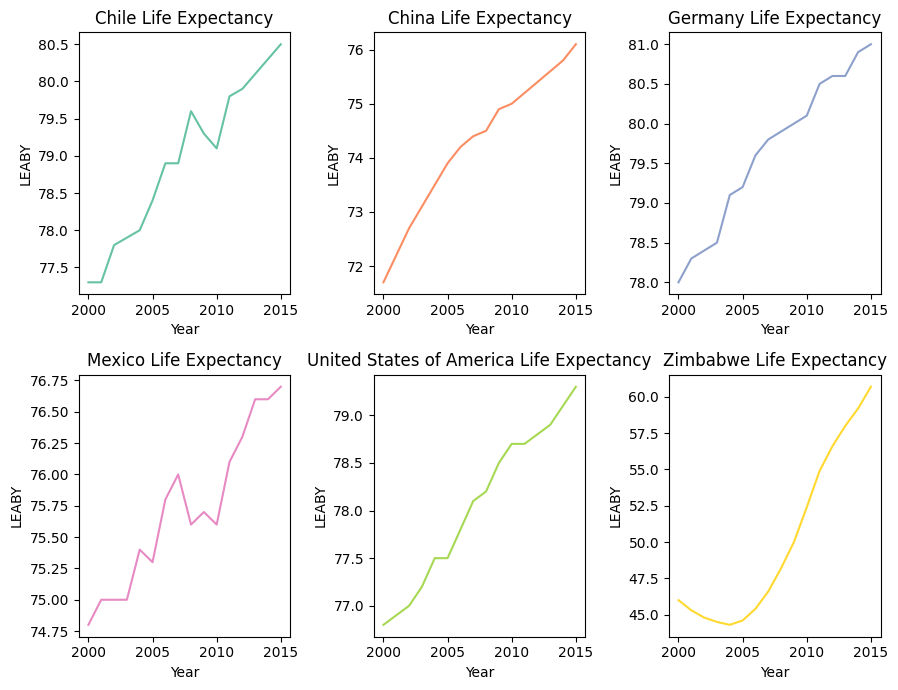

In [11]:
countries = ['Chile', 'China', 'Germany', 'Mexico', 'United States of America','Zimbabwe']

fig,axes = plt.subplots(2,3,figsize=(9,7))
palette = sns.color_palette("Set2", len(countries))

for i,country in enumerate(countries):
    df_country = df[df['Country'] == country]
    ax = axes[i//3,i%3]
    sns.lineplot(data=df_country,x='Year',y='LEABY',ax=ax,color=palette[i])
    ax.set_title(f'{country} Life Expectancy')

plt.tight_layout()
plt.show()

These charts provide a more detailed look at life expectancy trends in each country. China, Germany, Chile, and the US show steady increases over time, with minor fluctuations. Mexico follows a similar pattern but with more noticeable variations in certain years. Zimbabwe, on the other hand, experienced a decline in the early 2000s, followed by a sharp rise after 2005, indicating a significant improvement in life expectancy.

These trends highlight how life expectancy has evolved differently across countries, reflecting various economic, social, and healthcare factors.

#### What are the economic growth trends of countries over the years and what are the differences between them?

Economic growth plays a crucial role in shaping a country's development and overall well-being. To explore how different countries have progressed economically, we will start by examining key GDP statistics, such as average values and variations across nations. Next, we will analyze GDP distributions to understand the general trends. From there, we will look at how GDP has changed over time using line charts, followed by annual GDP growth rates to identify periods of expansion and contraction. Lastly, we will assess GDP volatility and calculate the Compound Annual Growth Rate (CAGR) to compare long-term economic performance.

By following this structured approach, we aim to gain a deeper understanding of how economies have evolved over the years and what factors might explain the differences between them.

In [12]:
df.groupby('Country')["GDP"].agg(["mean", "median", "min", 'max',"std"]).sort_values(by='mean', ascending=False).round(2)

,mean,median,min,max,std
Country,,,,,
United States of America,14075.00,14450.00,10300.00,18100.00,2432.69
China,4957.71,4075.20,1211.35,11064.70,3501.10
Germany,3094.78,3396.35,1949.95,3890.61,667.49
Mexico,976.65,1004.38,683.65,1298.46,209.57
Chile,169.79,173.00,69.74,278.38,76.88
Zimbabwe,9.06,6.73,4.42,16.30,4.30


When we look at GDP data, we see that there are big differences between countries. 

- The United States has by far the highest average GDP, followed by China, which we can estimate is growing rapidly over time. Germany also has a high economic power, but it does not show as great a variability as China.
- On the other hand, Mexico and Chile have much lower GDP levels and seem to be more stable. 
- Zimbabwe, on the other hand, has a much lower economic size and a high standard deviation, meaning that it may have experienced large fluctuations over the years.

But these data only give us a general picture. Now we will take a closer look at how GDP has changed over time and how it is trending!

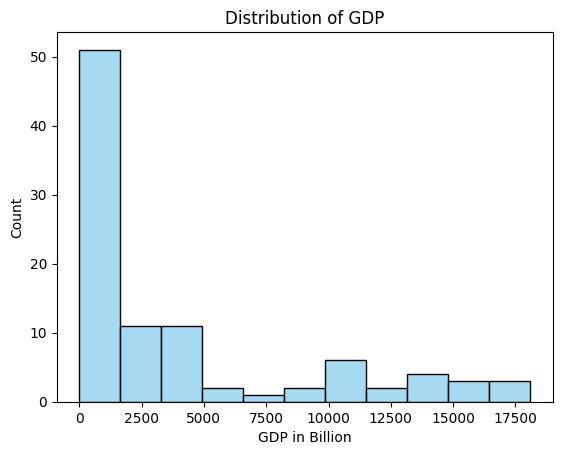

In [13]:
sns.histplot(df["GDP"],color='skyblue')
plt.xlabel('GDP in Billion')
plt.title('Distribution of GDP')
plt.show()

As the histogram clearly shows, GDP values are highly right-skewed. That is, countries with low GDP are highly concentrated, while countries with high GDP are more sparsely distributed.

In particular, since a few countries (probably the US and China) have very high GDP values, most of the histogram seems to be stuck in the low GDP range. To understand this distribution more clearly, we should also take a look at the GDP histograms by country!

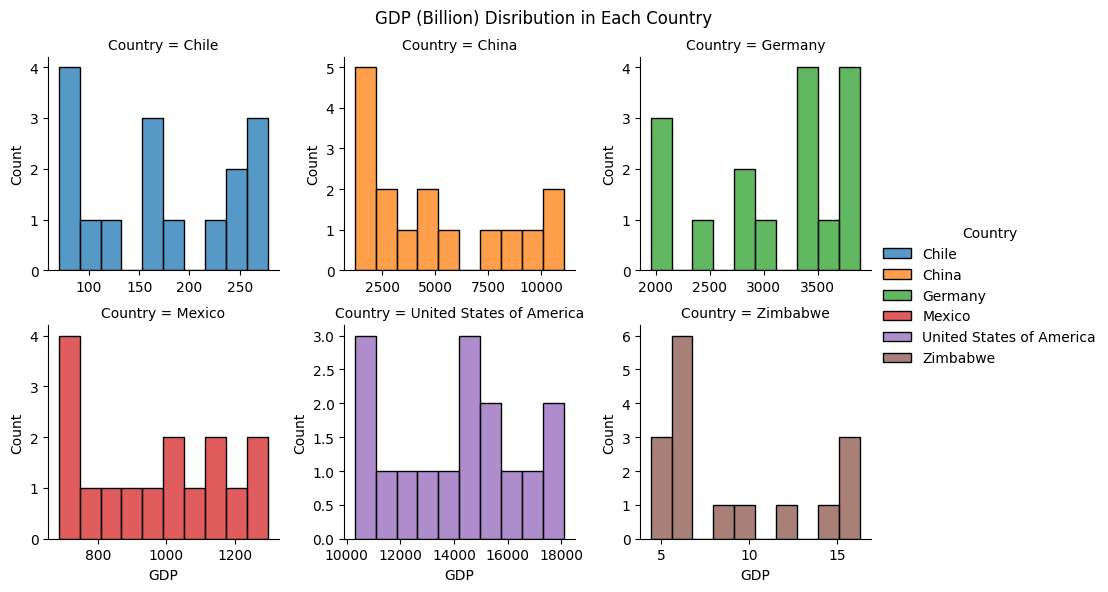

In [14]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3,hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.histplot,"GDP",bins=10).add_legend())
graph.fig.subplots_adjust(top=0.9)
graph.fig.suptitle('GDP (Billion) Disribution in Each Country')
plt.show()

The right-skewness in the overall histogram is also evident here for most countries.

- The US and China: GDP values are spread over a wide range, but China's distribution is more pronouncedly right-skewed. This means that while its GDP has increased over time, it is initially concentrated in low values.
- Germany and Mexico: They show a more balanced distribution, but Mexico's GDP has changed over a narrower range.
- Chile and Zimbabwe: Zimbabwe's GDP in particular has very small values and is concentrated in a low range.

These distributions help us to understand how the size of GDP varies across countries and how some countries' economic growth processes are shaped! 

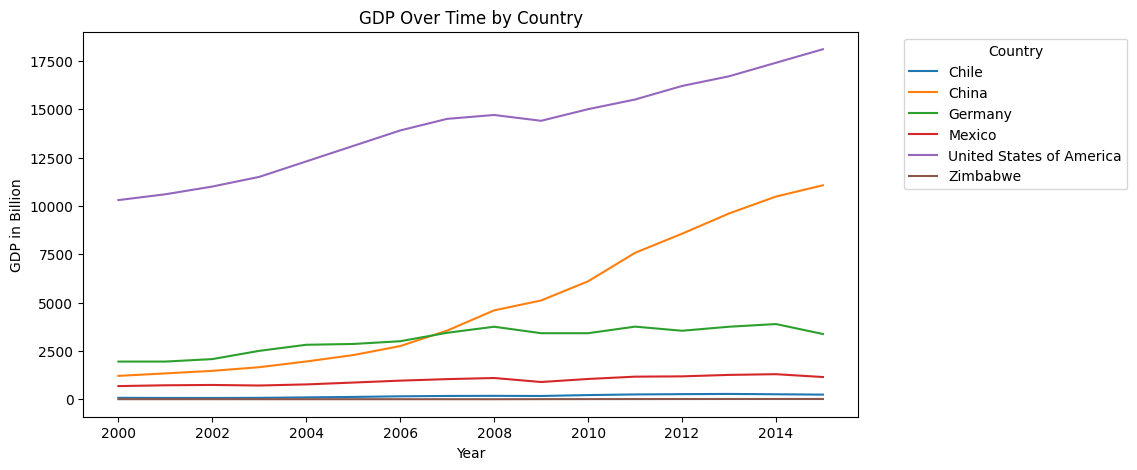

In [15]:
plt.figure(figsize=(10, 5))
ax=sns.lineplot(data=df, x="Year", y="GDP", hue="Country")
ax.set(title="GDP Over Time by Country",xlabel="Year",ylabel="GDP in Billion")
plt.legend(title='Country',bbox_to_anchor=(1.05, 1),loc=2)
plt.show()

This chart shows the overall economic growth trends of countries between 2000 and 2015. While the US has been growing steadily, China stands out with a big leap after 2005. Germany is generally on an upward trend, but fluctuates from time to time. Mexico and Chile's GDP are on a steady growth trend, albeit at lower levels. Zimbabwe, on the other hand, is generally at low levels and does not show a significant increase compared to other countries.

However, in order to better understand the economic growth dynamics of each country, we will now take each country individually and examine its detailed graphs.

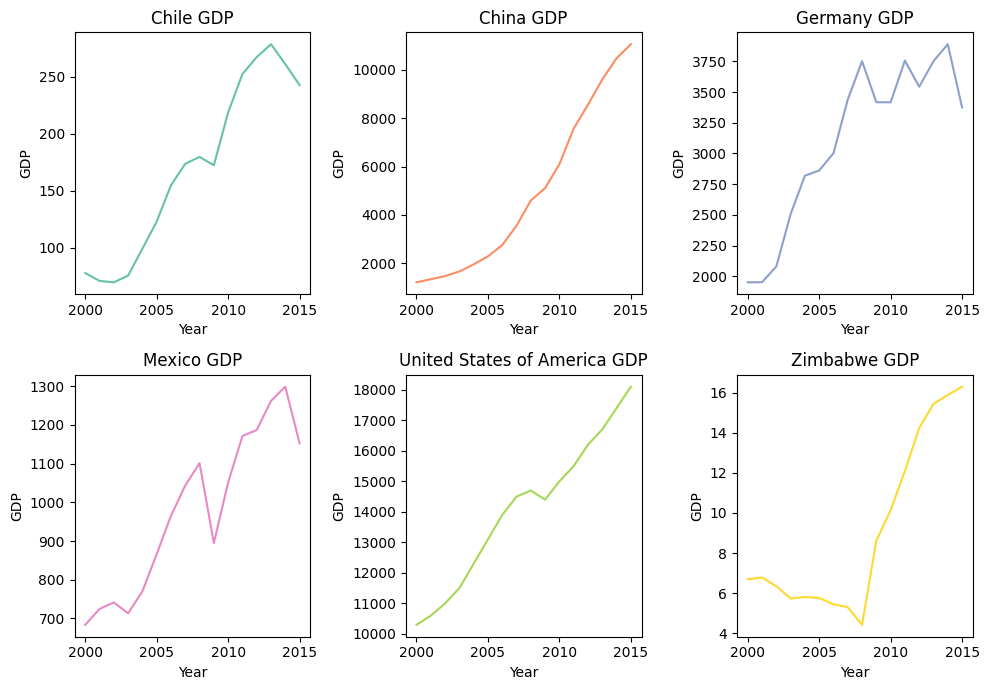

In [16]:
fig,axes = plt.subplots(2,3,figsize=(10,7))

for i,country in enumerate(countries):
    df_country = df[df['Country'] == country]
    ax = axes[i//3,i%3]
    sns.lineplot(data=df_country,x='Year',y='GDP',ax=ax,color=palette[i])
    ax.set_title(f'{country} GDP')

plt.tight_layout()
plt.show()

These charts show each country's GDP change over the years in more detail. China's rapid and uninterrupted growth is striking, while the US has followed a steady upward trend. Although there are fluctuations in Germany from time to time, it is generally on an upward trend. Mexico and Chile also show a growth trend, but declines in certain periods are noteworthy. Zimbabwe's GDP remained stagnant until the mid-2000s, but showed an increase after 2010.

To better understand GDP changes, let us now examine annual growth rates.

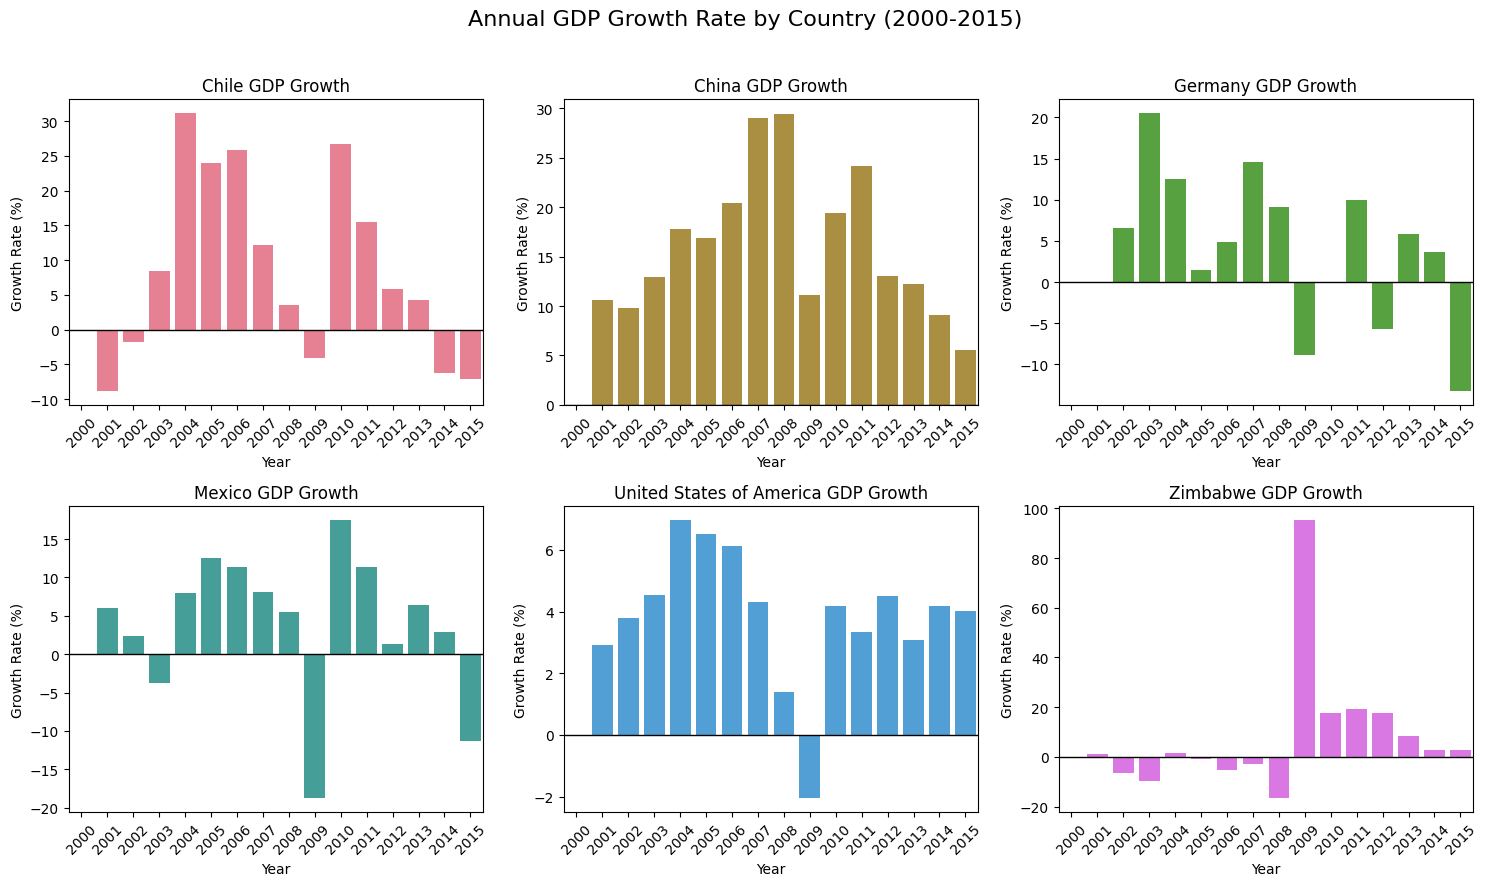

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(15, 9), sharey=False, sharex=False)

countries = df["Country"].unique()
colors = sns.color_palette("husl", len(countries))

for i, (country, color) in enumerate(zip(countries, colors)):
    row, col = divmod(i, 3)
    country_data = df[df["Country"] == country]
    
    sns.barplot(ax=axes[row, col], data=country_data, x="Year", y="GDP Growth", color=color)
    axes[row, col].axhline(0, color='black', linewidth=1)
    axes[row, col].set_title(f"{country} GDP Growth")
    axes[row, col].set_xlabel("Year")
    axes[row, col].set_ylabel("Growth Rate (%)")
    axes[row, col].tick_params(axis='x', rotation=45)

fig.suptitle("Annual GDP Growth Rate by Country (2000-2015)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

- Looking first at China, we see that it experienced a very strong economic expansion with double-digit growth rates between 2000 and 2010. It peaked in 2007-2008 with a growth rate close to 30%, but growth slowed down after 2010. This can be explained by China's transition from an industrial and export-oriented growth model to one based on boosting domestic consumption.

- Growth rates for the United States (US) generally range between 2-6%. The impact of the 2008 global economic crisis was clearly felt; growth was almost zero in 2008 and negative growth in 2009. However, after 2010, a recovery process began and growth rates rose again to 4-6%. This is a picture that shows the resilience of the US economy against crises and its capacity for rapid recovery.

- Germany is in a similar situation. While there was steady growth in the early 2000s, there was a serious contraction in the 2008-2009 crisis and the growth rate fell to around -10% in 2009. There was a strong recovery in 2010, but growth rates declined in the following years. Germany's industry-based economy is more vulnerable to global crises.

- As emerging economies, Mexico and Chile exhibit a volatile growth trajectory. Mexico's growth rate, which fell to -15% in 2009, shows how hard the country was hit by the crisis. Chile also had negative growth in 2009, but recovered significantly in 2010. These countries are more vulnerable to economic fluctuations.

- Zimbabwe's graph is quite unusual. After extremely negative growth in the 2008-2009 period, Zimbabwe has seen an extraordinary growth rate of over 80% in 2009. This is linked to the government's dollarization after the hyperinflation and economic collapse of the late 2000s. At the time, Zimbabwe abandoned its local currency and switched to the US dollar, which provided some stability to the economy. However, growth rates fell back to low levels in the following years.

In general, countries with stable growth rates have more solid economic foundations, while countries hit hard by crises reveal their economic fragility. China's growth slowdown, the post-crisis recovery in the US and Zimbabwe's extreme volatility are particularly noteworthy.

Now, to better understand the volatility of these growth rates, we look at the GDP growth volatility of each country.

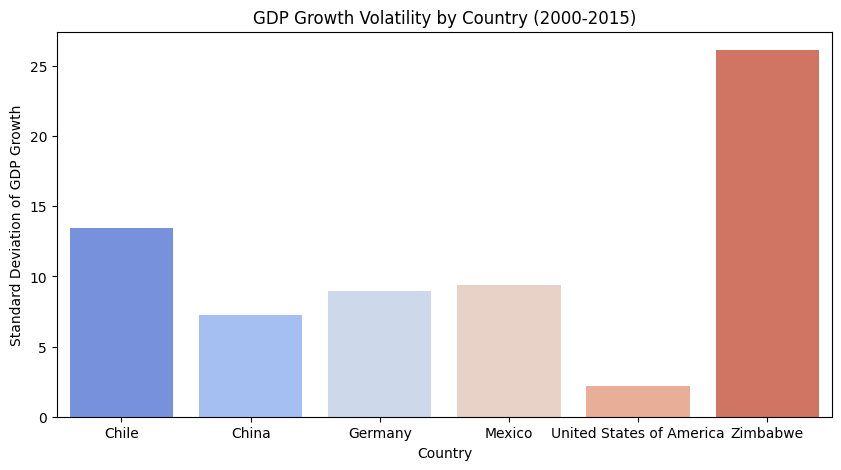

In [18]:
gdp_volatility = df.groupby("Country")["GDP Growth"].std().reset_index()
gdp_volatility.columns = ["Country", "GDP_Volatility"]

plt.figure(figsize=(10,5))
sns.barplot(data=gdp_volatility, x="Country", y="GDP_Volatility", hue="Country",palette="coolwarm")
plt.title("GDP Growth Volatility by Country (2000-2015)")
plt.xlabel("Country")
plt.ylabel("Standard Deviation of GDP Growth")
plt.show()

This graph shows the volatility (standard deviation) of countries' GDP growth rates between 2000 and 2015. The higher the standard deviation, the more volatile the growth rates.

- Zimbabwe has by far the highest volatility. This shows that its economy is extremely volatile and periodically experiences major crises. In the previous growth rate chart, we saw that Zimbabwe has experienced major crashes and sudden jumps in some years.

- Chile also has relatively high volatility. This is probably related to the rapid growth in the mid-2000s and the subsequent decline.

- Mexico and Germany also have moderate volatility. As these countries have been affected by global economic fluctuations, there may have been significant changes in their growth rates.

- China and the US have the lowest volatility. China's volatility is low because its growth is usually consistently high. The US, as a developed economy, has been able to maintain more balanced growth.

This graph shows that it is not only the growth rate that matters, but also economic stability. It is not enough to have a high growth rate; stable and sustainable growth is more valuable for long-term economic health. Countries with extreme volatility, such as Zimbabwe, can be economically fragile, while countries with low volatility, such as China and the US, have a more stable growth path.

Having analyzed the volatility in this chart, we will now analyze the CAGR values to understand the long-term economic growth rates of countries.

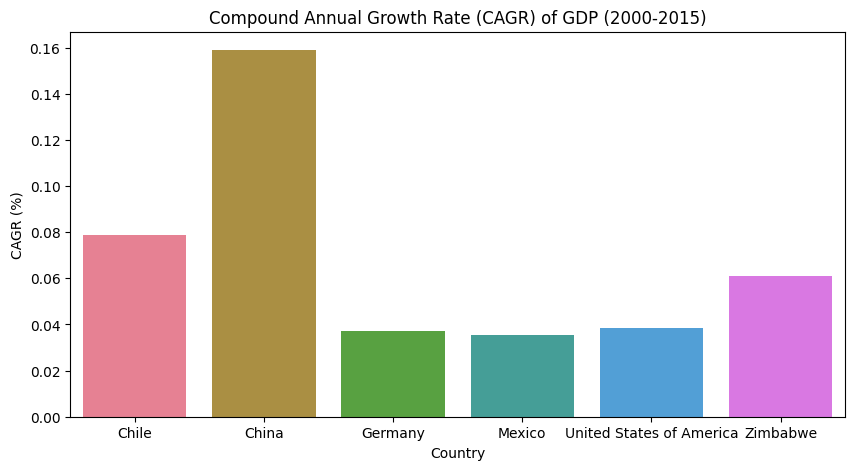

In [19]:
def calculate_cagr(start, end, years):
    return ((end / start) ** (1 / years)) - 1

cagr_values = {}
for country in df["Country"].unique():
    country_data = df[df["Country"] == country]
    gdp_start = country_data[country_data["Year"] == 2000]["GDP"].values[0]
    gdp_end = country_data[country_data["Year"] == 2015]["GDP"].values[0]
    cagr_values[country] = calculate_cagr(gdp_start, gdp_end, 15)

cagr_df = pd.DataFrame(list(cagr_values.items()), columns=["Country", "CAGR"])

plt.figure(figsize=(10,5))
sns.barplot(data=cagr_df, x="Country", y="CAGR", hue="Country",palette='husl')

plt.title("Compound Annual Growth Rate (CAGR) of GDP (2000-2015)")
plt.xlabel("Country")
plt.ylabel("CAGR (%)")
plt.xticks(rotation=0)
plt.show()

CAGR (Compound Annual Growth Rate) is a measure of the compound annual growth rate of an investment or economic indicator over a given time period. It is simply calculated by assuming that the growth between the starting and ending values occurs at the same rate each year. This is a very useful metric, especially when comparing economic growth and analyzing long-term trends.

The chart shows the compound annual growth rates of countries between 2000 and 2015. China stands out as the country with the highest growth rate, with a CAGR close to 16%. This reflects China's rapidly developing economy and strong growth trend. Chile and Zimbabwe also have relatively high growth rates, while more established economies such as Germany, Mexico and the US have lower CAGR rates.

The contribution of this graph to the analysis is significant because CAGR summarizes the long-term growth trend with a single metric and allows us to see the big picture by ignoring volatility due to year-on-year changes. This makes it possible to compare the economic performance of countries in a more reliable way.

#### How does GDP relate to life expectancy, and what patterns can we observe in different countries?

Economic growth and public health are often closely linked, but the nature of this relationship can vary across different countries. GDP represents the overall economic output of a nation, while life expectancy at birth (LEABY) reflects the well-being and quality of life of its population. Understanding how these two factors interact can provide valuable insights into the socioeconomic dynamics of different regions.

In this analysis, we will examine the relationship between GDP and life expectancy across multiple countries. By looking at overall trends and country-specific patterns, we aim to uncover whether higher GDP is consistently associated with longer life expectancy and whether certain countries exhibit unique deviations from this trend. Through statistical correlations and visual representations, we will explore how economic development may contribute to public health and longevity.

In [20]:
country_correlations = {}

for country in df["Country"].unique():
    country_data = df[df["Country"] == country]
    correlation = country_data[["GDP", "LEABY"]].corr().iloc[0, 1]
    country_correlations[country] = correlation

print("Correlation between GDP and Life Expectancy at Birth (LEABY) by Country\n")
for country, corr in country_correlations.items():
    print(f"{country}: {corr:.4f}")

Correlation between GDP and Life Expectancy at Birth (LEABY) by Country

Chile: 0.9499
China: 0.9085
Germany: 0.9327
Mexico: 0.9322
United States of America: 0.9817
Zimbabwe: 0.9662


These correlation values ​​indicate a strong and positive relationship between GDP and life expectancy. Correlation coefficients are above 0.90 in all countries, suggesting that economic growth is generally associated with longer life expectancy. The highest correlation is observed in the United States (0.98) and the lowest in China (0.90).

Now, to better understand the relationship between GDP and life expectancy, we will visualize the GDP and life expectancy of each country. This graph will allow us to see the general trends between the two variables more clearly.

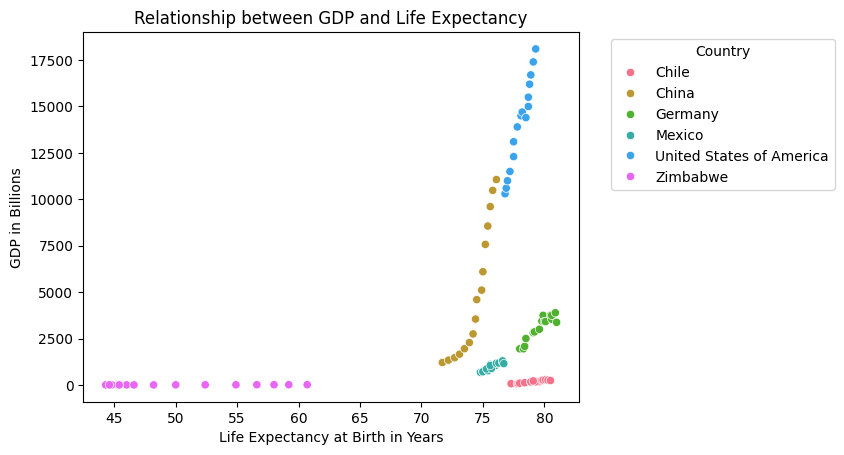

In [21]:
sns.scatterplot(data=df,x='LEABY',y='GDP',hue='Country',palette='husl')
plt.ylabel('GDP in Billions')
plt.xlabel('Life Expectancy at Birth in Years')
plt.title('Relationship between GDP and Life Expectancy')   
plt.legend(title='Country',bbox_to_anchor=(1.05, 1),loc=2)
plt.show()

This graph visualizes the relationship between GDP and life expectancy by country. In general, it is clear that life expectancy increases as GDP increases. However, the distributions between countries differ:

- USA, Germany and China: These countries have both high GDP and long life expectancy. While the US is at the top, a significant GDP increase is observed in China. Germany also shows a balanced increase with high GDP levels.
- Chile and Mexico: Life expectancy in these countries is around 75 years, but GDP levels are lower. Despite the change in GDP, life expectancy does not make very big jumps.
- Zimbabwe: The country with the most different position on the graph. Its GDP is at the lowest levels and life expectancy starts quite late. However, after a certain point, life expectancy increases along with GDP.

In general, we can say that there is a positive relationship between life expectancy and GDP. However, this relationship does not work the same way for every country. It is observed that even small GDP increases have a big impact on life expectancy, especially in countries that start with low GDP levels (like Zimbabwe).

Now, let's take the countries separately to examine this relationship in more detail!

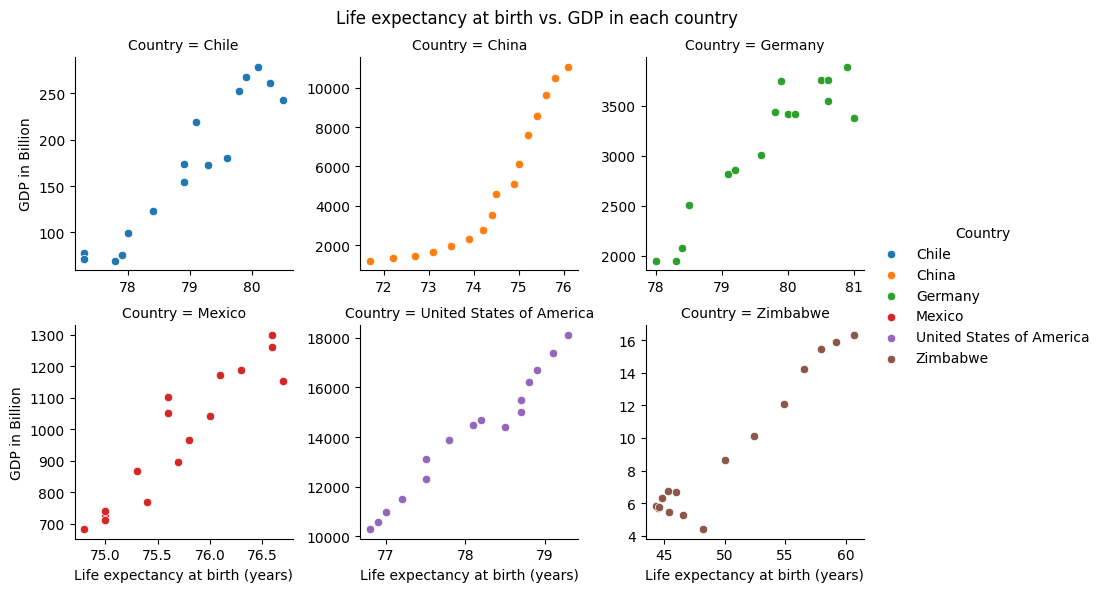

In [22]:
leaby_gdp = sns.FacetGrid(df, col="Country", col_wrap=3, hue ="Country",  sharey = False, sharex = False)
leaby_gdp = (leaby_gdp.map(sns.scatterplot, "LEABY", "GDP") .add_legend().set_axis_labels("Life expectancy at birth (years)", "GDP in Billion"))
leaby_gdp.fig.subplots_adjust(top=0.9)
leaby_gdp.fig.suptitle("Life expectancy at birth vs. GDP in each country")
plt.show()

These graphs show the relationship between GDP and life expectancy for each country separately. When we examine the general trends more closely, a positive relationship stands out: as GDP increases, life expectancy also increases. However, the intensity and shape of this increase vary for each country.

- In countries with high GDP, such as the USA and Germany, there is a regular relationship between GDP growth and life expectancy. However, this increase slows down after a certain point.

- In China, there is an accelerating trend: While GDP growth is relatively small at the beginning, GDP increases rapidly after a certain level, and life expectancy increases in parallel.

- In Chile and Mexico, the relationship is more linear. While GDP and life expectancy increase together, this increase is not very sharp.

- In Zimbabwe, one of the most striking trends is observed: GDP is initially quite low and life expectancy is also short. However, after a certain point, life expectancy increases significantly as GDP increases. This clearly shows the impact of economic recovery on public health and living conditions.

We see that the link between GDP and life expectancy is universal but has different dynamics. It can be said that even small increases can significantly increase life expectancy, especially at low GDP levels, but this effect decreases over time at high GDP levels. In addition to economic growth, it should not be ignored that factors such as access to health services, education and living conditions also have a major impact on life expectancy.

This analysis provides an important perspective on economic development and human life.

## Conclusion & Summary

In this analysis, we explored life expectancy at birth (LEABY) and gross domestic product (GDP) trends across six countries from 2000 to 2015. Our goal was to understand how these key indicators evolved over time and whether there is a meaningful relationship between economic growth and public health.

**Key Takeaways**

- Life expectancy has shown a steady increase in most countries. Developed nations like Germany and the United States have maintained relatively high life expectancies with gradual growth, whereas Zimbabwe, which started from a significantly lower baseline, experienced the most dramatic improvement in 2009.

* GDP growth patterns vary significantly across countries. While China exhibited an exceptional economic rise, countries like Chile and Mexico showed steady but more moderate growth. The United States maintained a strong upward trajectory, while Zimbabwe's economy remained relatively low despite some recovery in later years.

- A strong positive correlation between GDP and life expectancy was observed. Our analysis confirmed that as GDP increases, life expectancy also tends to rise. This trend was particularly clear in countries with rapid economic expansion, such as China and Zimbabwe, where both indicators improved significantly over time.

- The relationship between GDP and life expectancy is not always linear. While higher GDP is generally associated with longer life expectancy, other factors like healthcare systems, social policies, and income distribution also play a crucial role in shaping public health outcomes.

**Final Thoughts**

Our findings suggest that economic growth can contribute to improved life expectancy, but it is not the sole determinant of public health. While a strong economy provides resources for better healthcare, infrastructure, and living conditions, social and political factors also influence a country's overall well-being.

Understanding these relationships is essential for policymakers and researchers working to create sustainable development strategies that balance economic growth with public health improvements. Future research could incorporate additional social factors (such as education, healthcare spending, and income inequality) to develop a more comprehensive picture of what drives life expectancy improvements worldwide.
